In [1]:
# data: https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls
# mortality data :https://happiness-report.s3.amazonaws.com/2021/MortalityDataWHR2021C2.xlsx


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(r'C:\Users\noname797\Documents\ML_projects\Case_study\Datasets\DataPanelWHR2021C2.xlsx')

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [4]:
df['year']=df['year'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   object 
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), object(2)
memory usage: 167.6+ KB


In [6]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [7]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466707,9.368459,0.812553,63.359375,0.742567,0.000108,0.747111,0.709998,0.268552
std,1.115717,1.154091,0.118480,7.510244,0.142104,0.162221,0.186793,0.107106,0.085176
min,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737
25%,4.640079,8.463744,0.749390,58.685000,0.647048,-0.112973,0.690305,0.625373,0.206403
50%,5.386025,9.460323,0.835167,65.199997,0.763476,-0.025393,0.802428,0.722391,0.258117
75%,6.283498,10.352778,0.905291,68.589998,0.856030,0.090967,0.871942,0.799276,0.319716
max,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590


In [8]:
# cols = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
# for col in df[cols]:
#     df[cols] = df[cols].fillna(df[col].mean())

# This isn't a fair way to fill the data.

In [9]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [10]:
df_copy=df.copy()

In [11]:
# df_copy_enc=pd.concat([pd.get_dummies(df_copy['Country name'],drop_first=True),pd.get_dummies(df_copy['year'],drop_first=True),df_copy.iloc[:,2:]],axis=1)
# I think this is misbehaving idk y

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder_country= OneHotEncoder()
encoder_year=OneHotEncoder()
enc_country=encoder_country.fit_transform(df_copy.iloc[:,0].values.reshape(-1,1))
enc_year=encoder_year.fit_transform(df_copy.iloc[:,1].values.reshape(-1,1))


In [13]:
enc_country.toarray() # shape 1949X166

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
enc_year.toarray() # shape 1949X16

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
df_copy.iloc[:,2:]

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919
...,...,...,...,...,...,...,...,...,...
1944,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354


In [16]:
df_copy_enc=pd.concat([pd.DataFrame(enc_country.toarray()),pd.DataFrame(enc_year.toarray()),df_copy.iloc[:,2:]],axis=1)

In [17]:
df_copy_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,15,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# import numpy as np
# from sklearn.impute import KNNImputer

In [19]:
mice_x=imp.fit_transform(df_copy_enc.values)

In [20]:
df_mice=pd.DataFrame(mice_x)
df_mice.head()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [21]:
df_clean=pd.concat([pd.DataFrame(encoder_country.inverse_transform(df_mice.iloc[:,:166])),pd.DataFrame(encoder_year.inverse_transform(df_mice.iloc[:,166:182])),df_mice.iloc[:,182:]],axis=1)

In [22]:
df_clean.columns=df_copy.columns
df_clean.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [23]:
df_clean.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [24]:
df_clean.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,5.466707,9.369750,0.812710,63.422423,0.743418,0.000464,0.738990,0.709567,0.268784
std,1.115717,1.147192,0.118301,7.441094,0.142016,0.160750,0.189342,0.106874,0.085059
min,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737
25%,4.640079,8.474425,0.750277,58.900002,0.648155,-0.111311,0.681191,0.625106,0.206500
50%,5.386025,9.455823,0.835527,65.160004,0.765569,-0.024201,0.794484,0.721224,0.259038
75%,6.283498,10.346819,0.905080,68.599998,0.857677,0.091022,0.867640,0.797785,0.320167
max,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590


In [25]:
df_clean['year']=df_clean['year'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int32  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 160.0+ KB


In [26]:
df_clean.to_csv(r'C:\Users\noname797\Documents\ML_projects\Case_study\Datasets\cleanWHR.csv')

In [27]:
df_clean["Total_score"]=(df_clean["Life Ladder"]+df_clean["Log GDP per capita"]+df_clean["Social support"]+df_clean["Healthy life expectancy at birth"]+df_clean["Freedom to make life choices"]+df_clean["Generosity"]+df_clean["Positive affect"])- (df_clean["Perceptions of corruption"]+df_clean["Negative affect"])

In [28]:
# In the EDA we can ask some questions:

# what the correlation between features
# explore the some features (ex. country) depends on year
# explore the features depending on country
# explore the total score depending of country, show top- and bottom-10 countries

<ipython-input-29-b3550db8f709>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

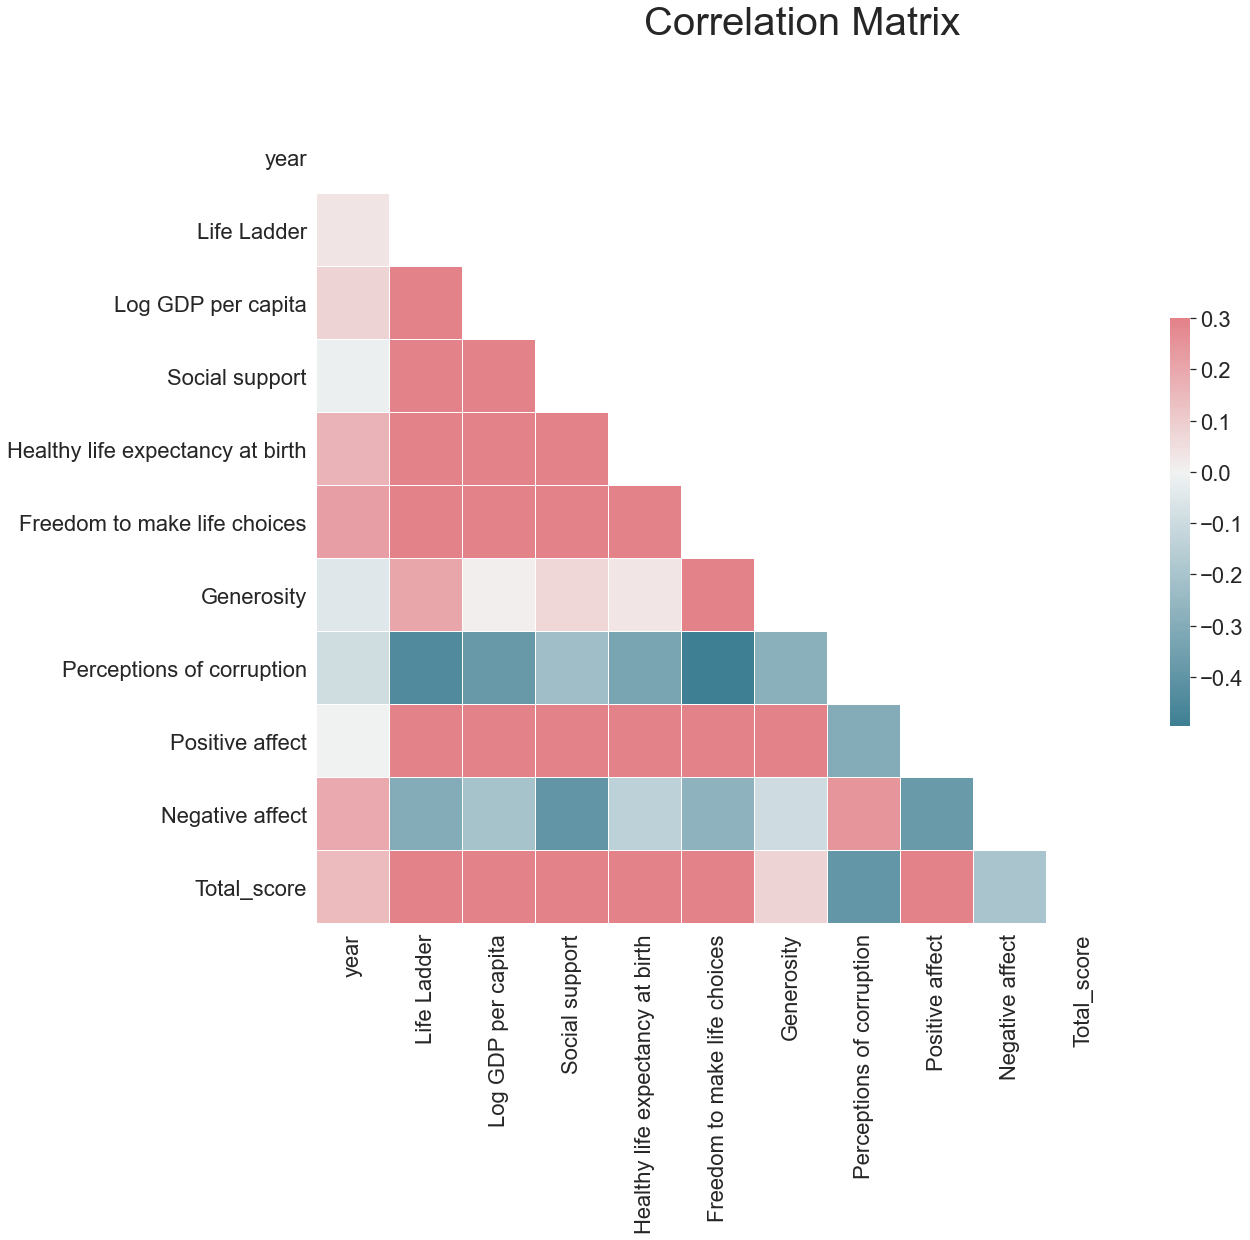

In [29]:
sns.set(style="white", font_scale=2)

corr = df_clean.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [30]:
country_total = df_clean.groupby('Country name')['Total_score'].mean().sort_values(ascending= False).head(10)
country_total

Country name
Singapore      95.436391
Switzerland    94.260337
Norway         93.547476
Iceland        93.340140
Canada         93.081494
Australia      93.049063
Luxembourg     92.971732
New Zealand    92.834365
Sweden         92.681731
Netherlands    92.394989
Name: Total_score, dtype: float64

In [31]:
country_total

Country name
Singapore      95.436391
Switzerland    94.260337
Norway         93.547476
Iceland        93.340140
Canada         93.081494
Australia      93.049063
Luxembourg     92.971732
New Zealand    92.834365
Sweden         92.681731
Netherlands    92.394989
Name: Total_score, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


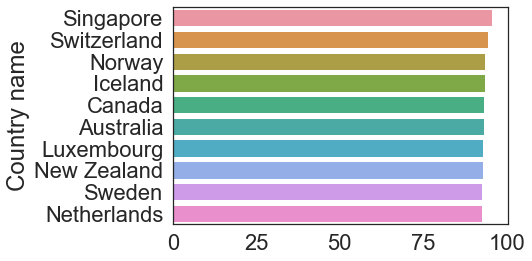

In [32]:
sns.set_palette('RdBu')
sns.barplot(country_total.values, country_total.index)
plt.show()

Country name
Luxembourg                   11.607032
Qatar                        11.507451
Singapore                    11.328985
Switzerland                  11.095401
Ireland                      11.064804
United Arab Emirates         11.059612
Norway                       11.039174
Kuwait                       10.974771
United States                10.956134
Hong Kong S.A.R. of China    10.890150
Name: Log GDP per capita, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


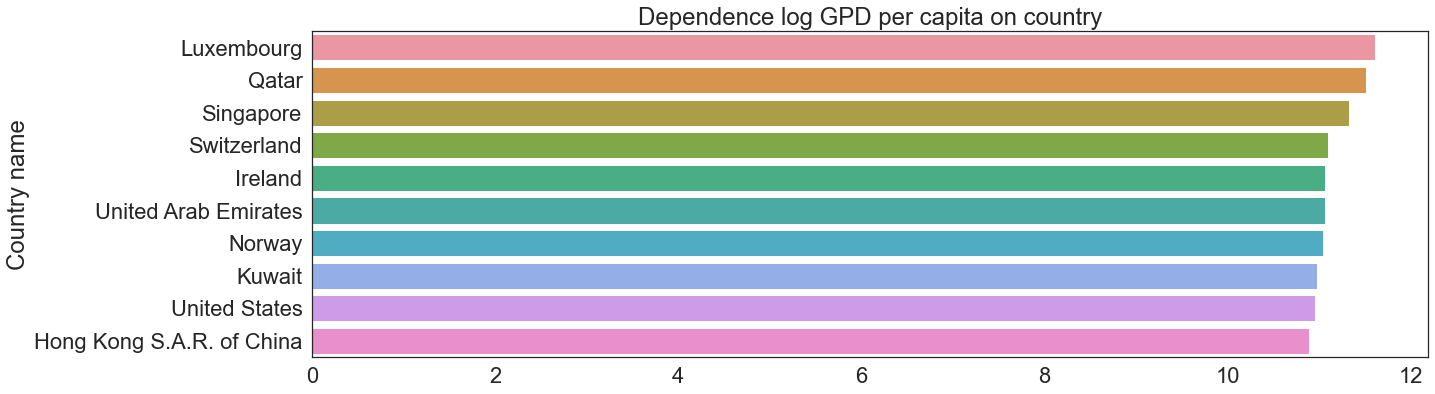

In [33]:
#let's see dependence of GPD per capita, Healthy life expectancy at birth and Social support on country(top 10)
gpd_country = df_clean.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending= False).head(10)
print(gpd_country)

sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.barplot(gpd_country.values, gpd_country.index).set_title('Dependence log GPD per capita on country')
plt.show()

Country name
Singapore      75.358461
Japan          74.292000
Switzerland    73.334000
Spain          73.314666
Italy          72.974667
Cyprus         72.969231
Iceland        72.865000
France         72.789333
Canada         72.694666
Australia      72.692857
Name: Healthy life expectancy at birth, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


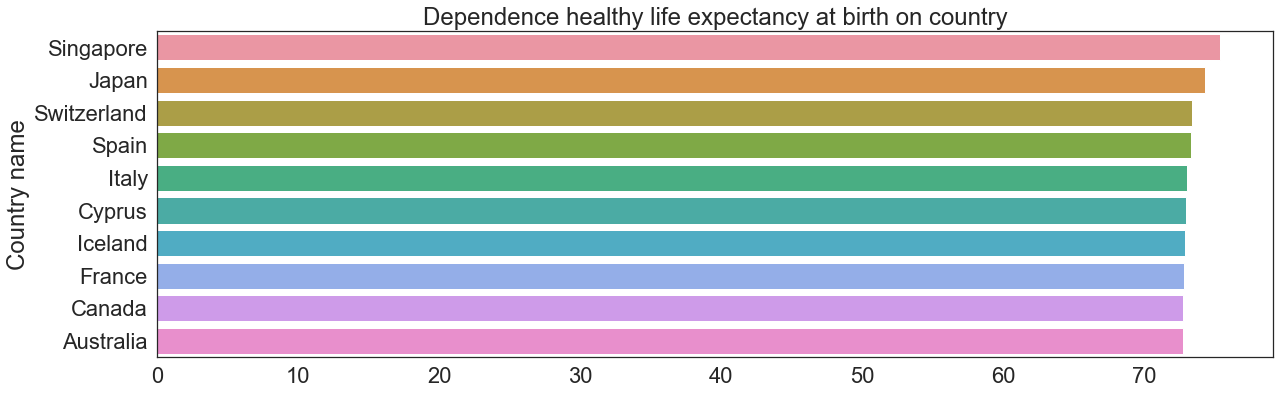

In [34]:
lifeexp_country = df_clean.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(10)
print(lifeexp_country)

plt.figure(figsize=(20, 6))
sns.barplot(lifeexp_country.values, lifeexp_country.index).set_title('Dependence healthy life expectancy at birth on country')
plt.show()

Country name
Iceland           0.977578
Cuba              0.969595
Ireland           0.959980
Denmark           0.957209
New Zealand       0.952875
Norway            0.950364
Finland           0.948971
Australia         0.947253
United Kingdom    0.945369
Switzerland       0.943610
Name: Social support, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


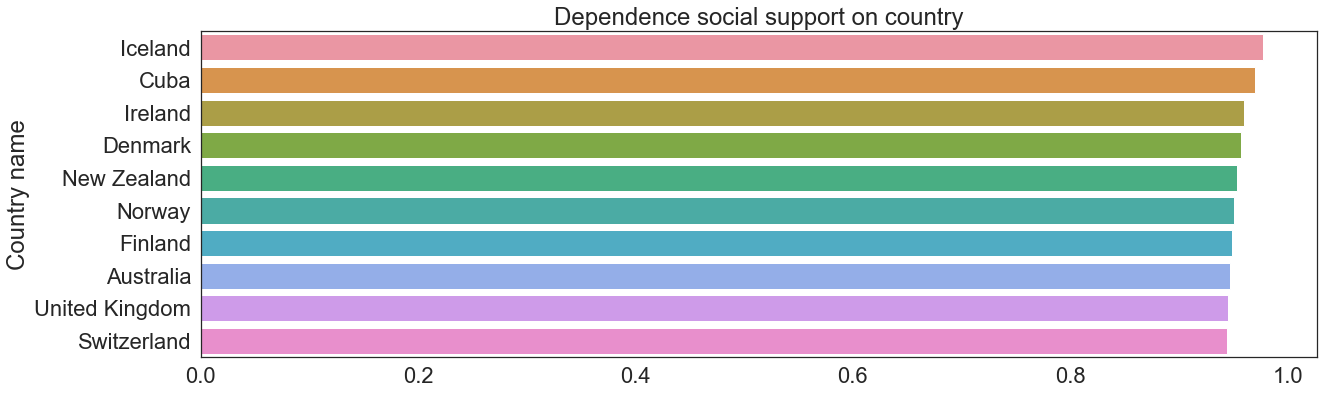

In [35]:
social_country = df_clean.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)
print(social_country)

plt.figure(figsize=(20, 6))
sns.barplot(social_country.values, social_country.index).set_title('Dependence social support on country')
plt.show()

Country name
Mali                        62.440601
Ivory Coast                 62.350815
Nigeria                     62.132068
Swaziland                   62.045550
Burundi                     61.660517
Lesotho                     60.073818
Haiti                       59.357120
Sierra Leone                57.943540
Chad                        57.904011
Central African Republic    54.269762
Name: Total_score, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


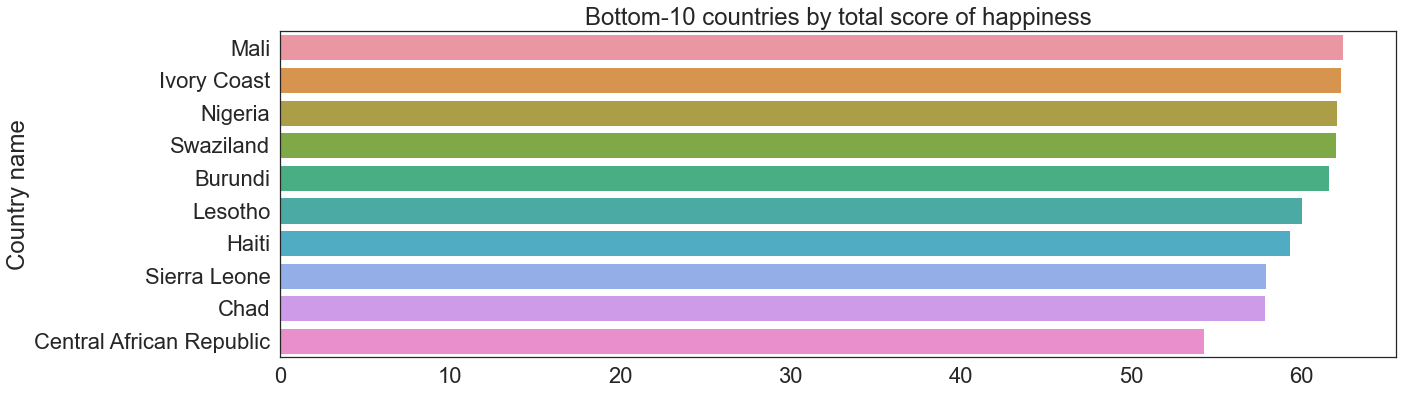

In [36]:
#also we need to see bottom-10 countries by total score of happiness
total_country_bad = df_clean.groupby('Country name')['Total_score'].mean().sort_values(ascending=False).tail(10)
print(total_country_bad)

plt.figure(figsize=(20, 6))
sns.barplot(total_country_bad.values, total_country_bad.index).set_title('Bottom-10 countries by total score of happiness')
plt.show()

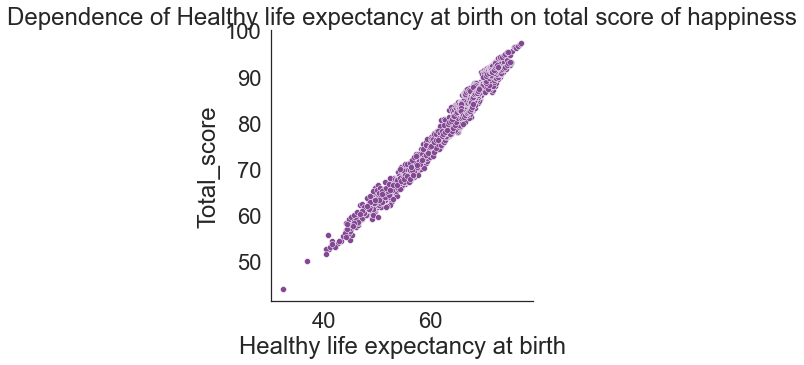

In [37]:
sns.relplot(x='Healthy life expectancy at birth', y='Total_score', data=df_clean, kind='scatter').set(title='Dependence of Healthy life expectancy at birth on total score of happiness')
plt.show()

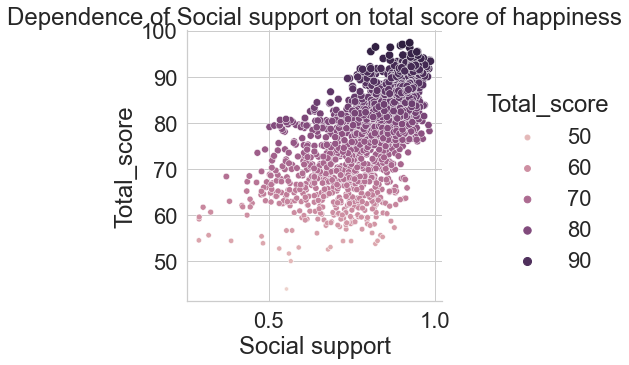

In [38]:
sns.set_style('whitegrid')
sns.relplot(x='Social support', y='Total_score', data=df_clean, kind='scatter', size='Total_score', hue='Total_score').set(title='Dependence of Social support on total score of happiness')
plt.show()

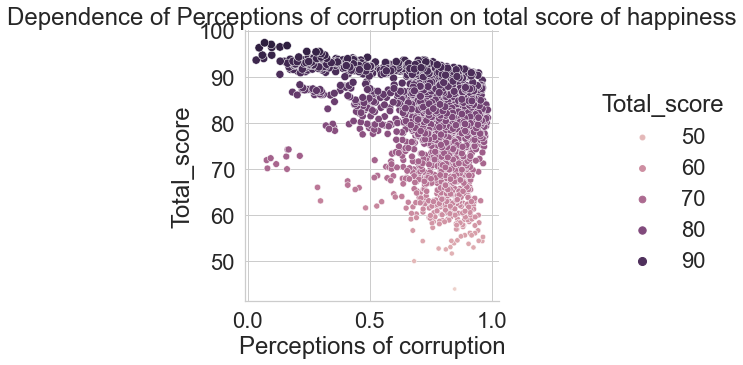

In [39]:
sns.set_style('whitegrid')
sns.relplot(x='Perceptions of corruption', y='Total_score', data=df_clean, kind='scatter', size='Total_score', hue='Total_score').set(title='Dependence of Perceptions of corruption on total score of happiness')
plt.show()

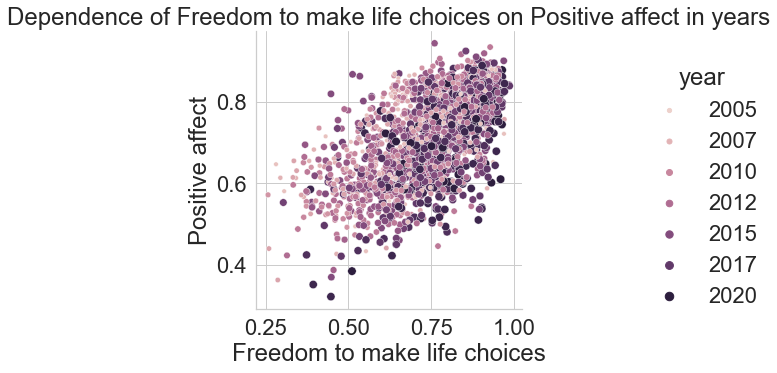

In [40]:
sns.set_style('whitegrid')
sns.relplot(x='Freedom to make life choices', y='Positive affect', data=df_clean, kind='scatter', size='year', hue='year').set(title='Dependence of Freedom to make life choices on Positive affect in years')
plt.show()

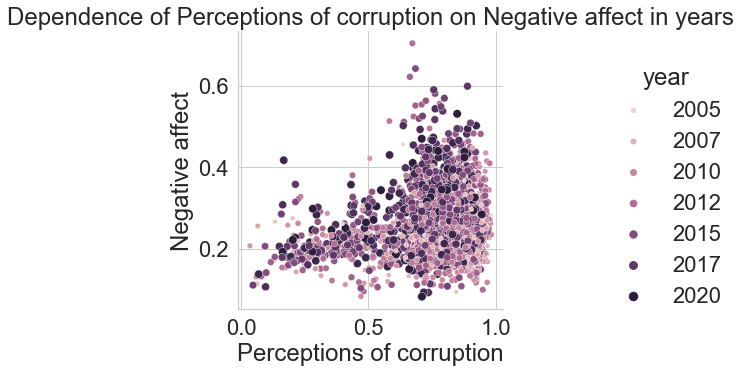

In [41]:
sns.set_style('whitegrid')
sns.relplot(x='Perceptions of corruption', y='Negative affect', data=df_clean, kind='scatter', size='year', hue='year').set(title='Dependence of Perceptions of corruption on Negative affect in years')
plt.show()

<Figure size 1440x432 with 0 Axes>

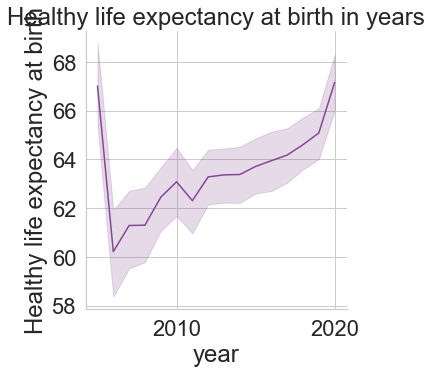

In [42]:
plt.figure(figsize=(20, 6))
sns.set_style('whitegrid')
sns.relplot(x='year', y='Healthy life expectancy at birth', data=df_clean, kind='line').set(title='Healthy life expectancy at birth in years')
plt.show()

<Figure size 1440x432 with 0 Axes>

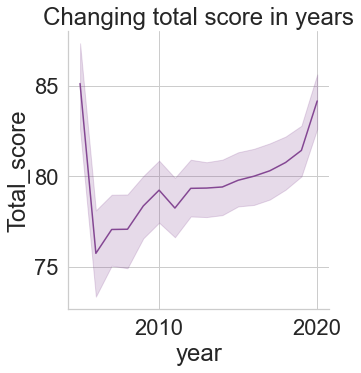

In [43]:
plt.figure(figsize=(20, 6))
sns.relplot(x='year', y='Total_score', data=df_clean, kind='line').set(title='Changing total score in years')
plt.show()

<Figure size 1440x432 with 0 Axes>

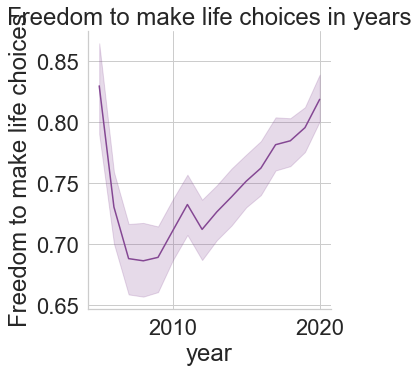

In [44]:
plt.figure(figsize=(20, 6))
sns.relplot(x='year', y='Freedom to make life choices', data=df_clean, kind='line').set(title='Freedom to make life choices in years')
plt.show()

<Figure size 1440x432 with 0 Axes>

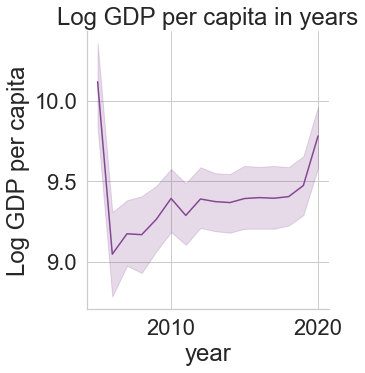

In [45]:
plt.figure(figsize=(20, 6))
sns.relplot(x='year', y='Log GDP per capita', data=df_clean, kind='line').set(title='Log GDP per capita in years')
plt.show()

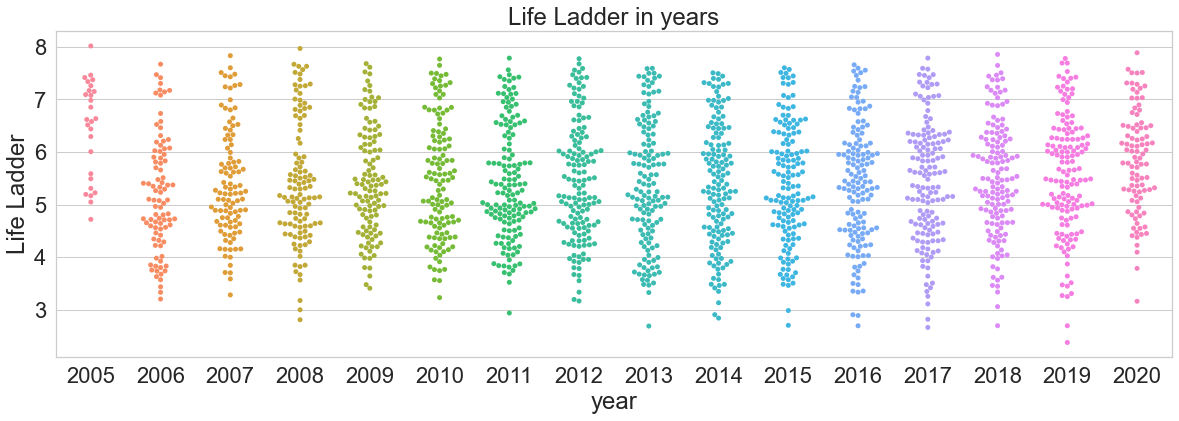

In [46]:
#Life Ladder
plt.figure(figsize=(20, 6))
sns.swarmplot(x='year', y='Life Ladder', data=df_clean).set(title='Life Ladder in years')
plt.show()

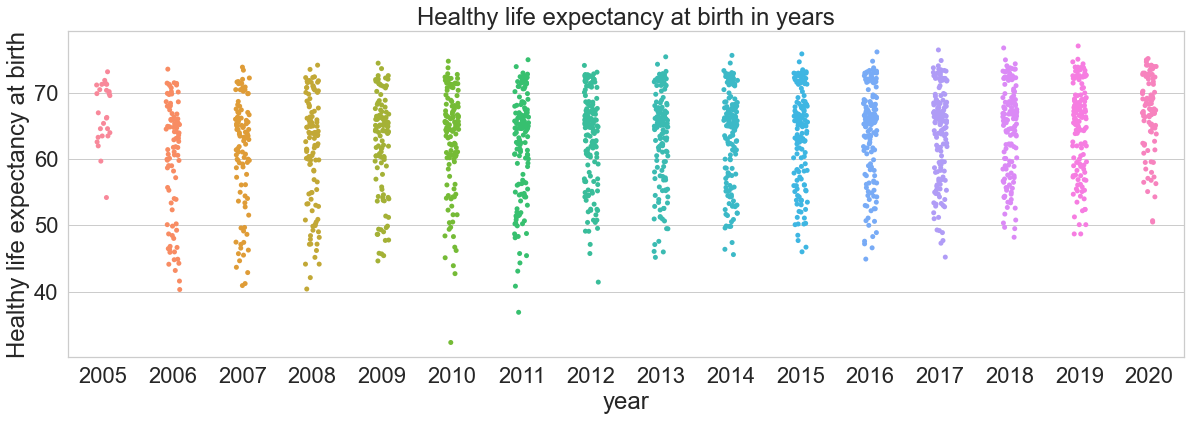

In [47]:
#Healthy life expectancy at birth
plt.figure(figsize=(20, 6))
sns.stripplot(x='year', y='Healthy life expectancy at birth', data=df_clean).set(title='Healthy life expectancy at birth in years')
plt.show()

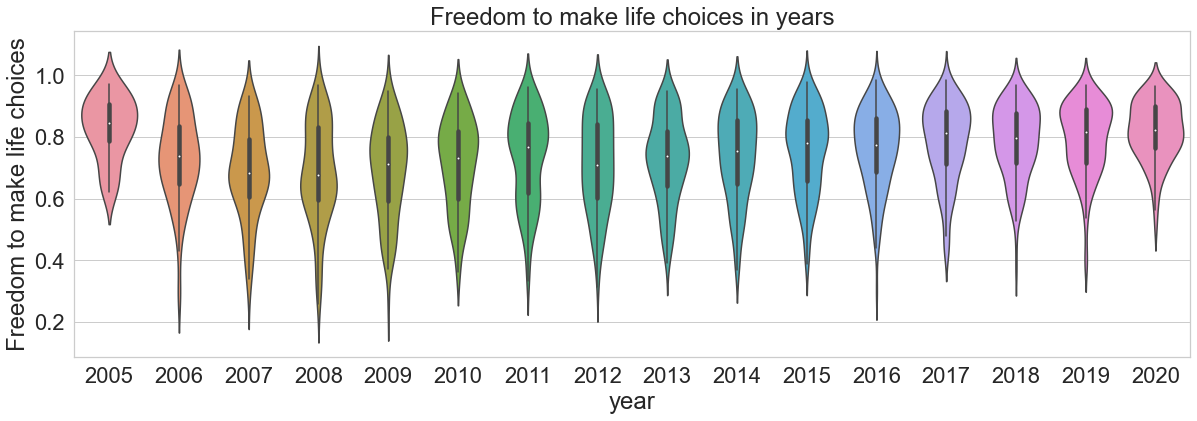

In [48]:
#Freedom to make life choices
plt.figure(figsize=(20, 6))
sns.violinplot(x='year', y='Freedom to make life choices', data=df_clean).set(title='Freedom to make life choices in years')
plt.show()

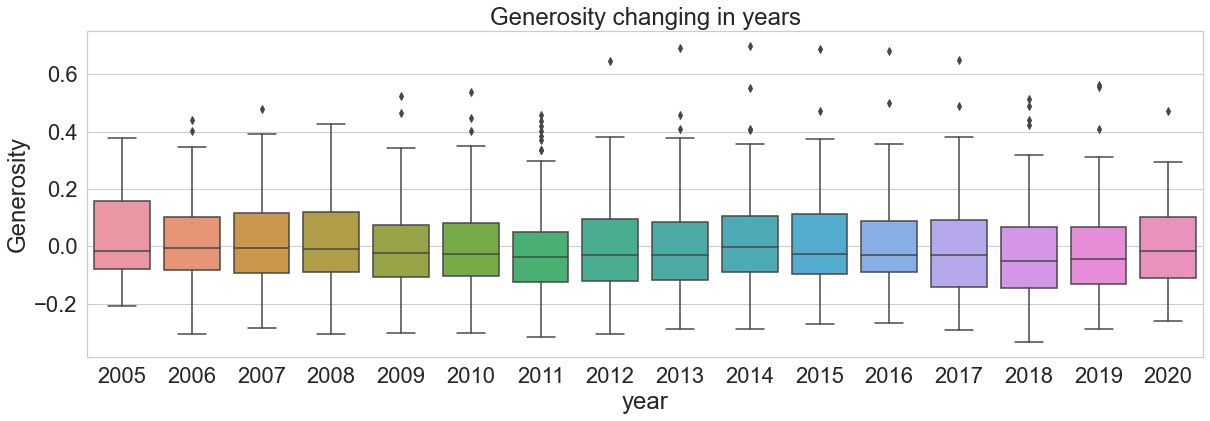

In [49]:
#generosity by years in a boxplot()
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='Generosity', data=df_clean).set(title='Generosity changing in years')
plt.show()

In [50]:
corruption_country_top10 = df_clean.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).head(10)
corruption_country_top10

Country name
Romania                   0.953186
Bosnia and Herzegovina    0.944200
Bulgaria                  0.941952
Moldova                   0.933742
Ukraine                   0.932625
Indonesia                 0.931390
Croatia                   0.927823
Trinidad and Tobago       0.927045
Portugal                  0.921191
Lithuania                 0.918326
Name: Perceptions of corruption, dtype: float64

In [51]:
corruption_country_bottom10 = df_clean.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).tail(10)
corruption_country_bottom10

Country name
Norway                  0.344084
Switzerland             0.305930
United Arab Emirates    0.296194
New Zealand             0.266145
Sweden                  0.265189
Finland                 0.248932
Qatar                   0.216296
Denmark                 0.200404
Rwanda                  0.185955
Singapore               0.100509
Name: Perceptions of corruption, dtype: float64

In [52]:
#add country of interest in a separate list
countries = df_clean[(df_clean['Country name'] == 'Russia')| (df_clean['Country name'] == 'China') | (df_clean['Country name'] == 'United States') | (df_clean['Country name'] == 'Sweden') | (df_clean['Country name'] == 'India')]

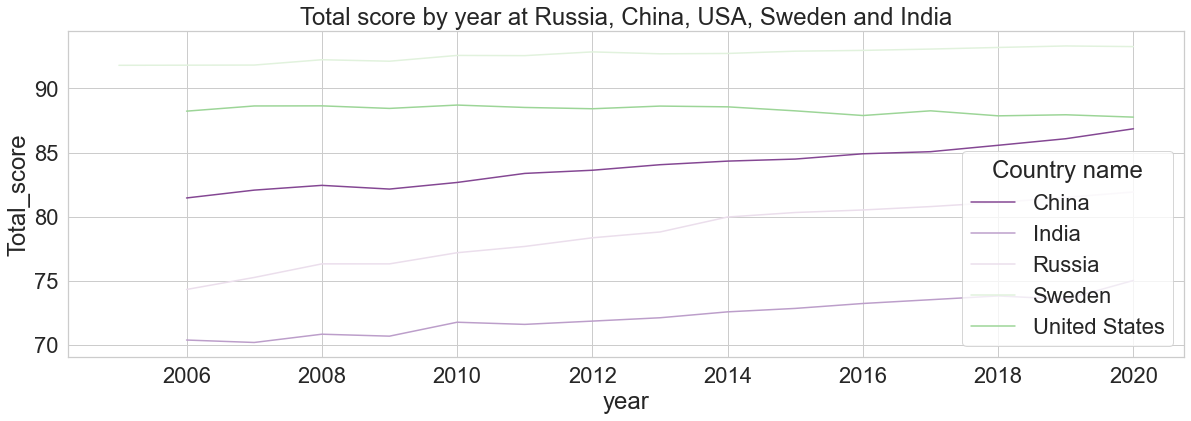

In [53]:
#create a lineplot with this countries grouped by total score and year
sns.set_style('whitegrid')
sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Total_score', data=countries, hue='Country name').set(title='Total score by year at Russia, China, USA, Sweden and India')
plt.show()

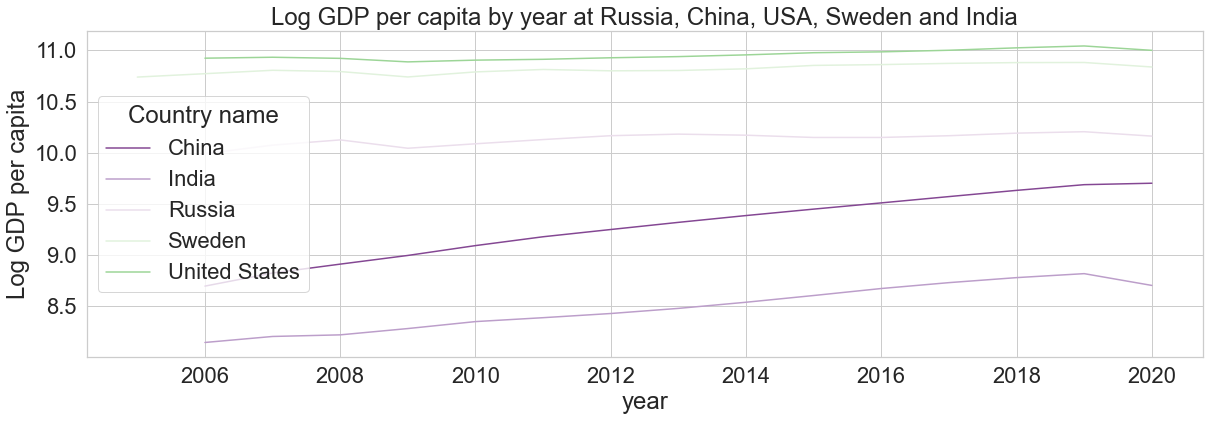

In [54]:
#log GDP per capita in years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Log GDP per capita', data=countries, hue='Country name').set(title='Log GDP per capita by year at Russia, China, USA, Sweden and India')
plt.show()

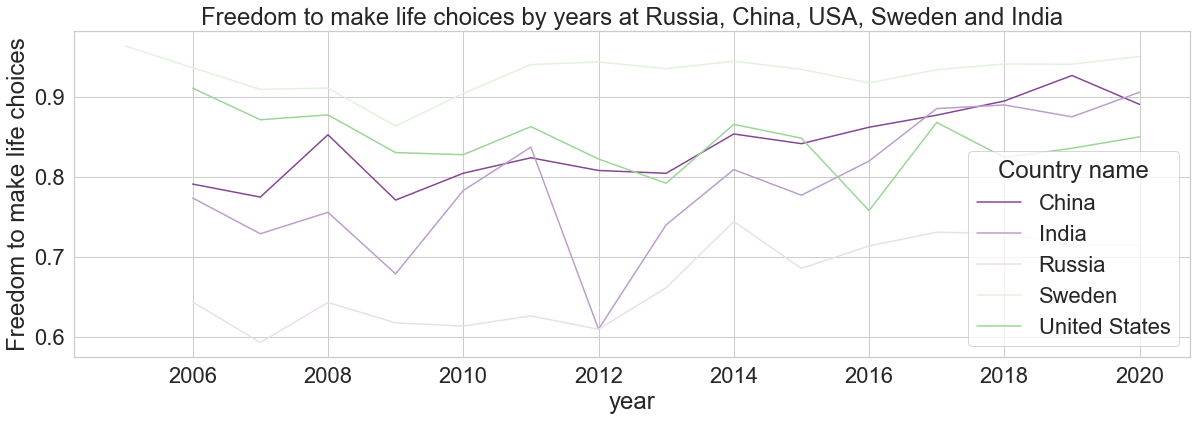

In [55]:
#Freedom to make life choices by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Freedom to make life choices', data=countries, hue='Country name').set(title='Freedom to make life choices by years at Russia, China, USA, Sweden and India')
plt.show()

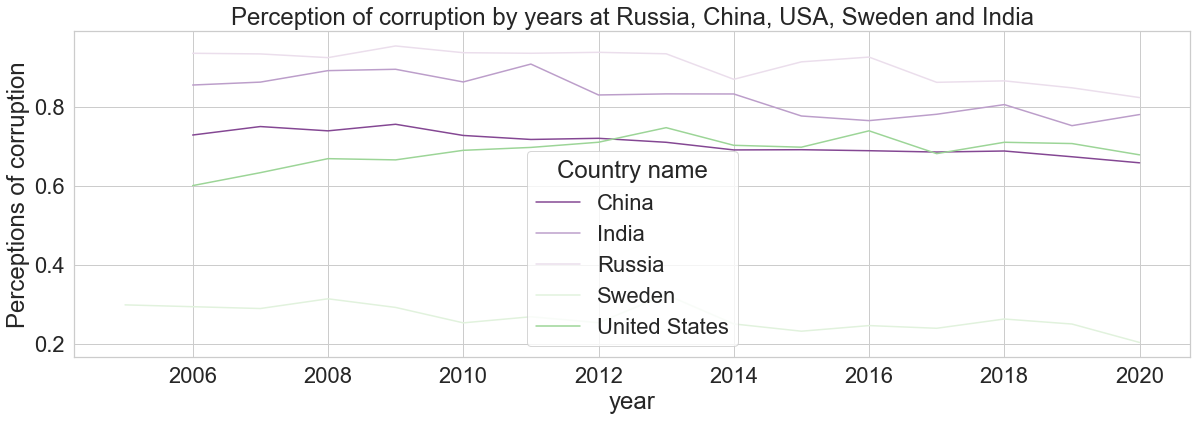

In [56]:
#perception of corruption by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Perceptions of corruption', data=countries, hue='Country name').set(title='Perception of corruption by years at Russia, China, USA, Sweden and India')
plt.show()

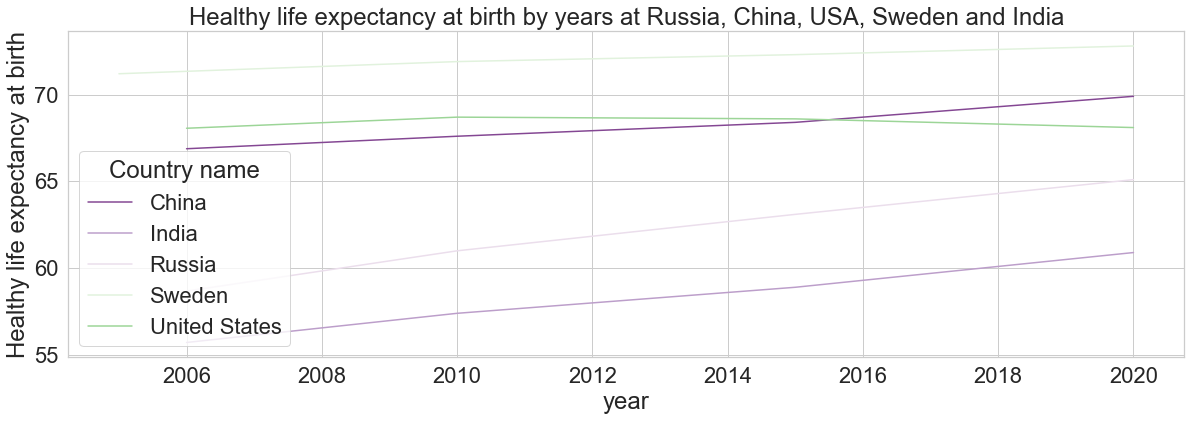

In [57]:
#Healthy life expectancy at birth by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Healthy life expectancy at birth', data=countries, hue='Country name').set(title='Healthy life expectancy at birth by years at Russia, China, USA, Sweden and India')
plt.show()